# FGSM attack on network, trained on MNIST. Adapted from https://pytorch.org/tutorials/beginner/fgsm_tutorial.html

In [1]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from torch.cuda import set_device
from fgsm_attack import test
from classifier_arch import MnistResNet
%matplotlib inline

gpu_id = 2;
cuda_avail = torch.cuda.is_available();

print("CUDA Available: ", cuda_avail);
if cuda_avail:
    print('Using gpu with id', gpu_id);
    set_device(gpu_id);
    device = torch.device("cuda:" + str(gpu_id))
else:
    print('Using CPU');
    device = torch.device("cpu");

CUDA Available:  True
Using gpu with id 2


## Preparing for attack

In [2]:
#epsilons = [0, .05, .1, .15, .2, .25, .3];
epsilons = [0, .1, .2, .3, .4, .5, .6];
test_loader = torch.utils.data.DataLoader(datasets.MNIST('', 
                                                         train=False, 
                                                         download=True, 
                                                         transform=transforms.Compose([transforms.ToTensor(),])),
                                          batch_size=1, 
                                          shuffle=True);

accuracies_van = []
examples_van = []

accuracies_inn = []
examples_inn = []

## Performing attack on vanilla net

In [3]:
model = MnistResNet();
if cuda_avail:
    model.cuda();
    model.load_state_dict(torch.load('MNIST_ResNet_vanilla_best.pt', map_location=lambda storage, loc: storage.cuda(gpu_id)), strict=True);
model.train(False);

# run test for each epsilon
for eps in epsilons:
    acc, ex = test(model, device, test_loader, eps, cuda_avail);
    accuracies_van.append(acc);
    examples_van.append(ex);

Epsilon: 0	Test Accuracy = 9941 / 10000 = 0.9941
Epsilon: 0.1	Test Accuracy = 9147 / 10000 = 0.9147
Epsilon: 0.2	Test Accuracy = 8467 / 10000 = 0.8467
Epsilon: 0.3	Test Accuracy = 8248 / 10000 = 0.8248
Epsilon: 0.4	Test Accuracy = 8136 / 10000 = 0.8136
Epsilon: 0.5	Test Accuracy = 8121 / 10000 = 0.8121
Epsilon: 0.6	Test Accuracy = 8128 / 10000 = 0.8128


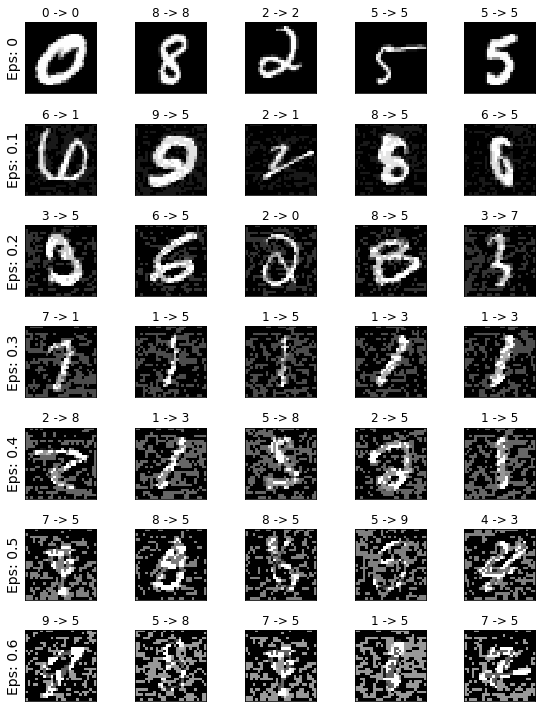

In [7]:
# plot several examples of adversarial samples at each epsilon
cnt = 0
plt.figure(figsize=(8,10))
for i in range(len(epsilons)):
    for j in range(len(examples_van[i])):
        cnt += 1
        plt.subplot(len(epsilons),len(examples_van[0]),cnt)
        plt.xticks([], [])
        plt.yticks([], [])
        if j == 0:
            plt.ylabel("Eps: {}".format(epsilons[i]), fontsize=14)
        orig,adv,ex = examples_van[i][j]
        plt.title("{} -> {}".format(orig, adv))
        plt.imshow(ex, cmap="gray")
plt.tight_layout()
plt.show()

## Performing attack on INN

In [8]:
model = MnistResNet();
if cuda_avail:
    model.cuda();
    model.load_state_dict(torch.load('MNIST_ResNet_INN_best.pt', map_location=lambda storage, loc: storage.cuda(gpu_id)), strict=True);
model.train(False);

# run test for each epsilon
for eps in epsilons:
    acc, ex = test(model, device, test_loader, eps, cuda_avail);
    accuracies_inn.append(acc);
    examples_inn.append(ex);

Epsilon: 0	Test Accuracy = 9946 / 10000 = 0.9946
Epsilon: 0.1	Test Accuracy = 9330 / 10000 = 0.933
Epsilon: 0.2	Test Accuracy = 9109 / 10000 = 0.9109
Epsilon: 0.3	Test Accuracy = 9092 / 10000 = 0.9092
Epsilon: 0.4	Test Accuracy = 9094 / 10000 = 0.9094
Epsilon: 0.5	Test Accuracy = 9096 / 10000 = 0.9096
Epsilon: 0.6	Test Accuracy = 9098 / 10000 = 0.9098


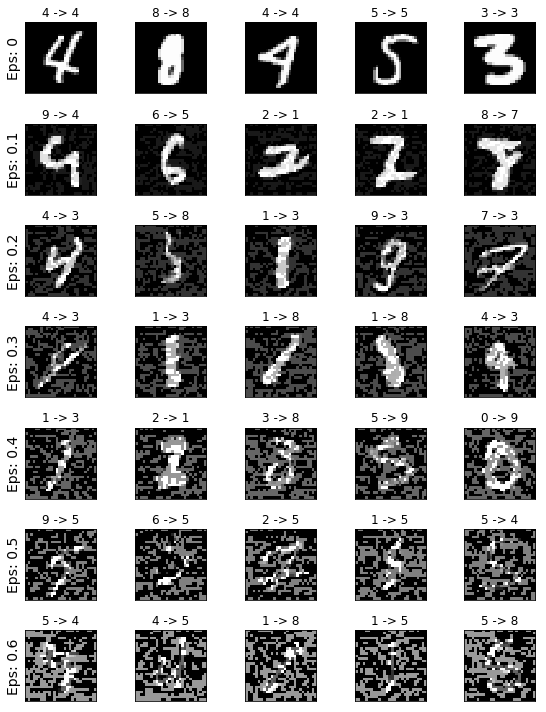

In [9]:
# plot several examples of adversarial samples at each epsilon
cnt = 0
plt.figure(figsize=(8,10))
for i in range(len(epsilons)):
    for j in range(len(examples_inn[i])):
        cnt += 1
        plt.subplot(len(epsilons),len(examples_inn[0]),cnt)
        plt.xticks([], [])
        plt.yticks([], [])
        if j == 0:
            plt.ylabel("Eps: {}".format(epsilons[i]), fontsize=14)
        orig,adv,ex = examples_inn[i][j]
        plt.title("{} -> {}".format(orig, adv))
        plt.imshow(ex, cmap="gray")
plt.tight_layout()
plt.show()

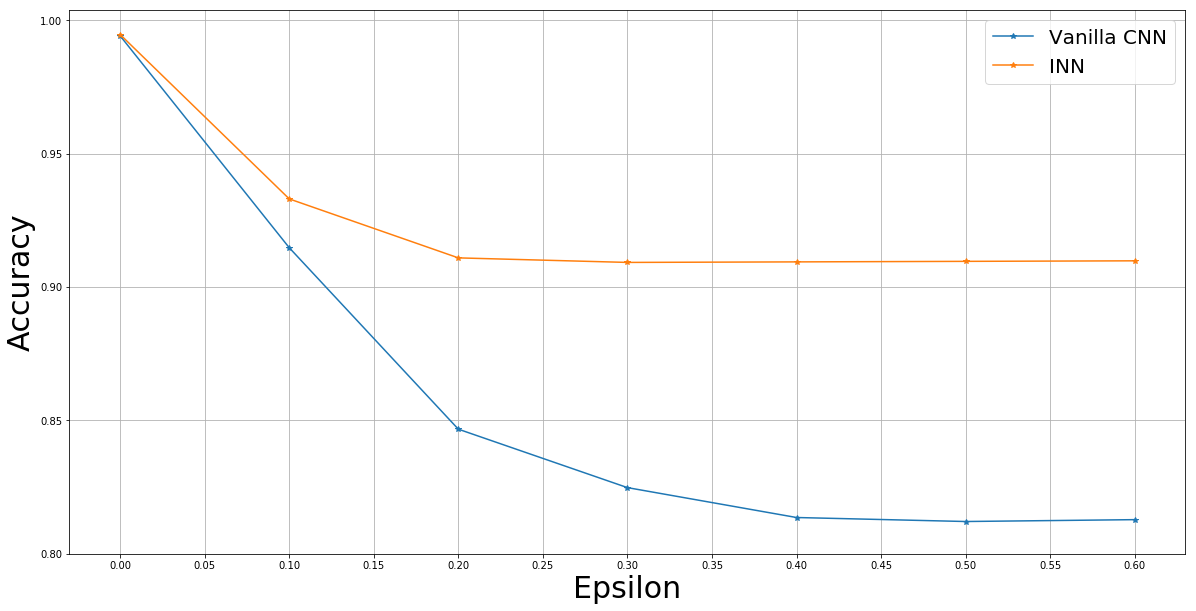

In [13]:
plt.figure(figsize=(20,10));
plt.plot(epsilons, accuracies_van, "*-");
plt.plot(epsilons, accuracies_inn, "*-");
plt.yticks(np.arange(0.8, 1.05, step=0.05));
plt.xticks(np.arange(0, .65, step=0.05));
plt.legend(['Vanilla CNN', 'INN'], fontsize=20);
plt.xlabel("Epsilon", fontsize=30);
plt.ylabel("Accuracy", fontsize=30);
plt.grid();
plt.show();